In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif  # ANOVA F-value as scoring function
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, roc_auc_score, roc_curve, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving old Employee churn intention survey normalized.csv to old Employee churn intention survey normalized.csv


In [ ]:
# Load the dataset

data = pd.read_csv('old Employee churn intention survey normalized.csv')


In [ ]:
# Handle categorical variables if needed (encode labels)
# Load the dataset

data = pd.read_csv('old Employee churn intention survey normalized.csv')
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])
        print(data.head())

In [ ]:
# Separate features and target variable
X = data.drop(columns=['TOI'])
y = data['TOI']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
# Define number of top features to select
k = 15

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_smote, y_train_smote)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")


Selected features: Index(['Work_Tenure', 'thinking of quitting from this office/organization ',
       ' searching for  an alternative job ', ' low work motivation',
       'Weekly_Working_Hours_Ordinal (Reverse Coded)',
       'satisfied with my workload ', ' satisfied with my compensation ',
       'good relationship with peers', 'satisfied with my career',
       ' satisfied with my job profession',
       'satisfied with my work-life balance', ' My work is meaningful ',
       'My family supports my current working condition',
       'mentally well and do not have anxiety', 'JE (Job engagement)'],
      dtype='object')


In [ ]:
# Train Random Forest on selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train_smote)

# Predict on test set
y_pred = rf_selected.predict(X_test_selected_features)
y_pred_proba = rf_selected.predict_proba(X_test_selected)[:, 1]  # For ROC AUC and ROC curve


NameError: name 'X_test_selected_features' is not defined

Accuracy: 0.8712871287128713
Precision: 0.8235294117647058
Recall: 0.8
F1 Score: 0.8115942028985507
MCC: 0.7140539856488047
ROC AUC: 0.9140692640692641
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        66
           1       0.82      0.80      0.81        35

    accuracy                           0.87       101
   macro avg       0.86      0.85      0.86       101
weighted avg       0.87      0.87      0.87       101



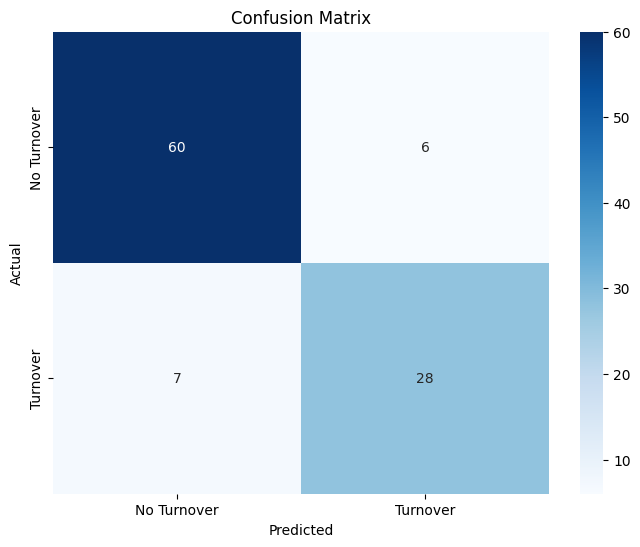

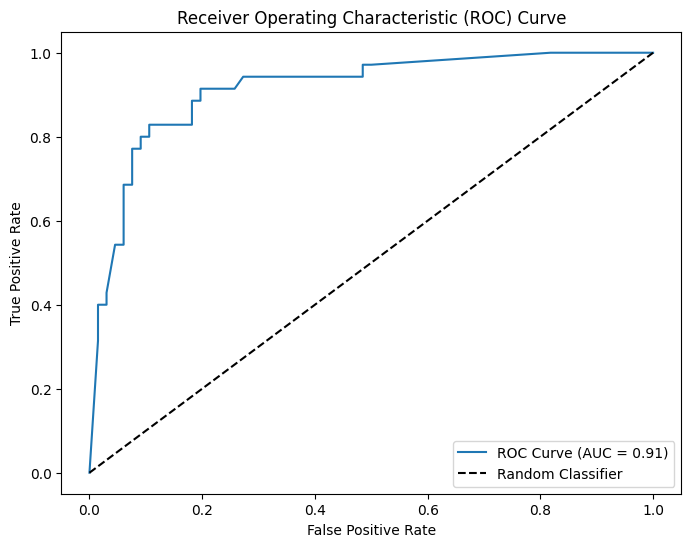

In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"MCC: {mcc}")
print(f"ROC AUC: {roc_auc}")

# Generate classification report
print(classification_report(y_test, y_pred))

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Turnover', 'Turnover'], yticklabels=['No Turnover', 'Turnover'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.8947
Precision: 0.8600
Recall: 0.8269
F1 Score: 0.8431
MCC: 0.7643
AUC: 0.9442

Confusion Matrix:
 [[93  7]
 [ 9 43]]


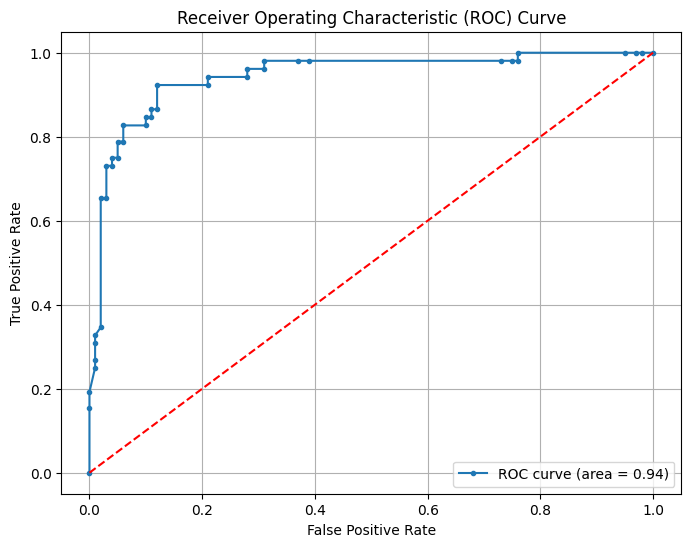

Selected Features: Index(['Age', 'Gender', 'Work tenure', 'Job position', 'working hour',
       'satisfaction with workload', 'satisfied  compensation ',
       ' good relationship with peers ',
       ' satisfied with career and  opportunity',
       'satisfied with job profession ', ' monthly average expenditure',
       ' satisfied with  work-life balance', ' work is meaningful ',
       'family supports ', ' mentally well and do not have anxiety '],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, roc_auc_score, roc_curve, confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Define features and target
X = data.drop(columns=['TOI (turnover intention)'])
y = data['TOI (turnover intention)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Select top k features using SelectKBest
k = 15 # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_kbest = selector.fit_transform(X_train_resampled, y_train_resampled)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Grid Search for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_kbest, y_train_resampled)

# Select the best model
best_model = grid_search.best_estimator_

# Transform the test set using SelectKBest
X_test_kbest = selector.transform(X_test)

# Predict on the test set
y_pred = best_model.predict(X_test_kbest)
y_prob = best_model.predict_proba(X_test_kbest)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"AUC: {auc:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Show selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


                                              Feature  TOPSIS_Score  \
9                         satisfied with my workload       0.620593   
7                                 low work motivation      0.620437   
19                                JE (Job engagement)      0.618251   
6                  searching for  an alternative job       0.617345   
5   thinking of quitting from this office/organiza...      0.614473   
10                    satisfied with my compensation       0.613562   
18              mentally well and do not have anxiety      0.600276   
15                satisfied with my work-life balance      0.593165   
13                   satisfied with my job profession      0.574214   
17    My family supports my current working condition      0.568986   
8        Weekly_Working_Hours_Ordinal (Reverse Coded)      0.561828   
12                           satisfied with my career      0.506194   
16                             My work is meaningful       0.505670   
4     

<ipython-input-11-b62ffb4579a9>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOPSIS_Score', y='Feature', data=combined_df, palette='viridis')


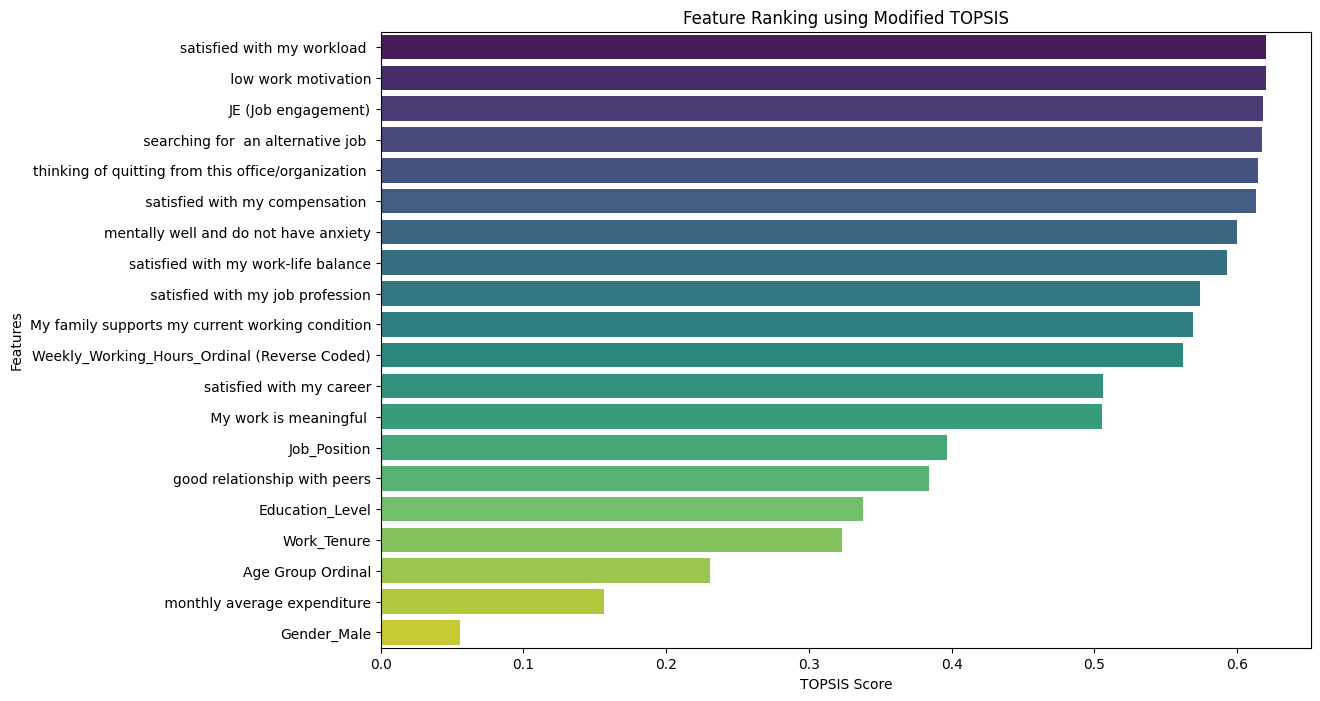

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
340 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Results for k=15
Accuracy: 0.9934
Precision: 1.0000
Recall: 0.9796
F1 Score: 0.9897
MCC: 0.9850
AUC: 0.9992

Confusion Matrix:
 [[103   0]
 [  1  48]]




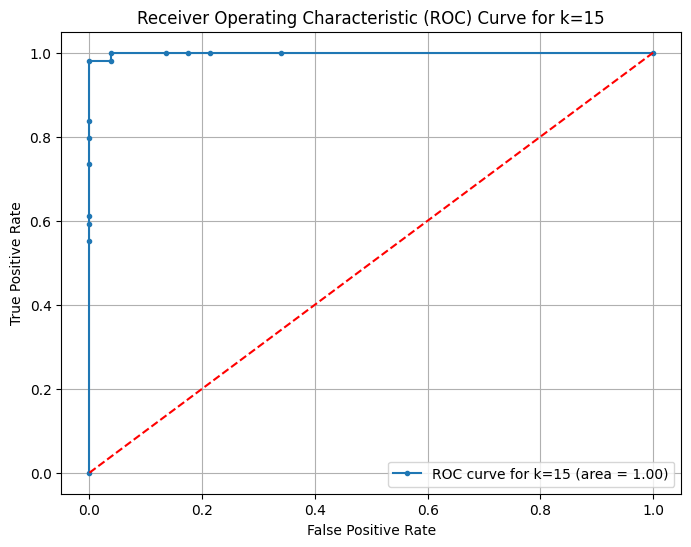

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
193 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Results for k=10
Accuracy: 0.9934
Precision: 1.0000
Recall: 0.9796
F1 Score: 0.9897
MCC: 0.9850
AUC: 1.0000

Confusion Matrix:
 [[103   0]
 [  1  48]]




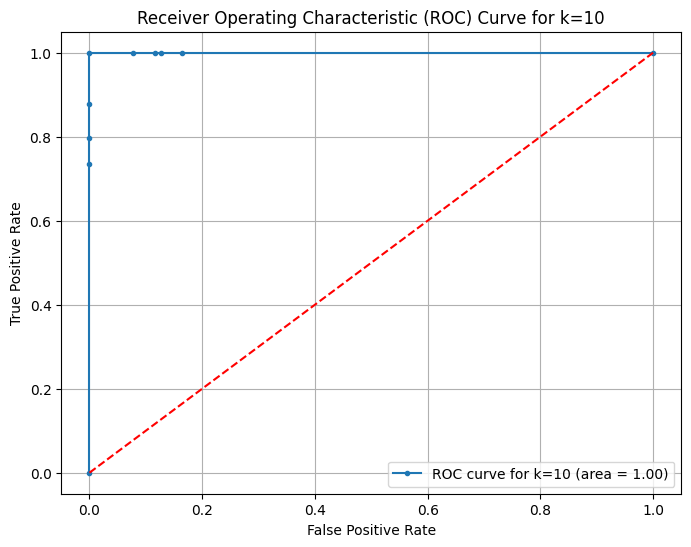

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
224 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Results for k=5
Accuracy: 0.9934
Precision: 1.0000
Recall: 0.9796
F1 Score: 0.9897
MCC: 0.9850
AUC: 0.9996

Confusion Matrix:
 [[103   0]
 [  1  48]]




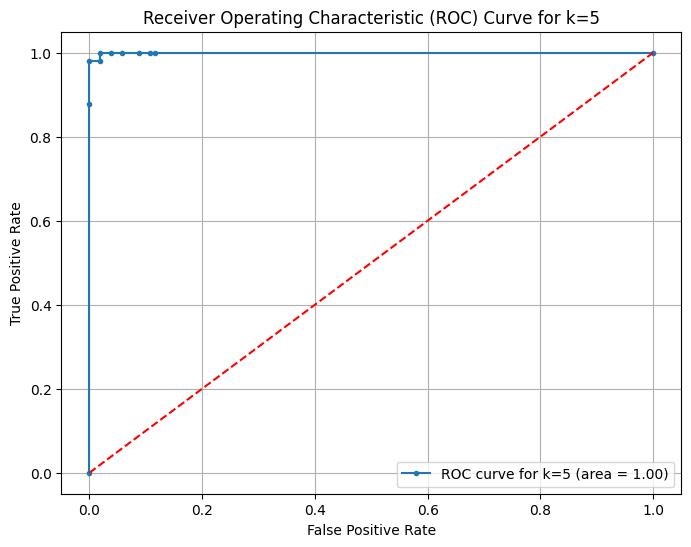

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, roc_auc_score, roc_curve, confusion_matrix
)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = data.drop(columns=['TOI'])
y = data['TOI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Compute Information Gain Scores
info_gain_selector = SelectKBest(score_func=mutual_info_classif, k='all')
info_gain_selector.fit(X_train_resampled, y_train_resampled)
info_gain_scores = info_gain_selector.scores_
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Info_Gain': info_gain_scores})

# Compute SelectKBest Scores
select_k_best = SelectKBest(score_func=f_classif, k='all')
select_k_best.fit(X_train_resampled, y_train_resampled)
select_kbest_scores = select_k_best.scores_
select_kbest_df = pd.DataFrame({'Feature': X.columns, 'SelectKBest_Score': select_kbest_scores})

# Compute RFE Scores
rf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=1)
rfe.fit(X_train_resampled, y_train_resampled)
rfe_ranking = rfe.ranking_
rfe_df = pd.DataFrame({'Feature': X.columns, 'RFE_Ranking': rfe_ranking})

# Aggregate Scores
combined_df = info_gain_df.merge(select_kbest_df, on='Feature').merge(rfe_df, on='Feature')
combined_df['RFE_Importance'] = combined_df['RFE_Ranking'].max() - combined_df['RFE_Ranking']  # Invert ranking for consistency (higher is better)

# Normalize scores for TOPSIS
scaler = MinMaxScaler()
scores = scaler.fit_transform(combined_df[['Info_Gain', 'SelectKBest_Score', 'RFE_Importance']])
combined_df[['Norm_Info_Gain', 'Norm_SelectKBest_Score', 'Norm_RFE_Importance']] = scores

# Prepare for TOPSIS
topsis_matrix = combined_df[['Norm_Info_Gain', 'Norm_SelectKBest_Score', 'Norm_RFE_Importance']].values
weights = np.array([2, 1, 2])  # Adjusted weights for better performance

# Ideal and anti-ideal solutions
ideal_best = np.max(topsis_matrix, axis=0)
ideal_worst = np.min(topsis_matrix, axis=0)
weighted_data = topsis_matrix * weights

# Calculate distances
manhattan_to_best = np.sum(np.abs(weighted_data - ideal_best), axis=1)
manhattan_to_worst = np.sum(np.abs(weighted_data - ideal_worst), axis=1)
euclidean_to_best = np.sqrt(np.sum((weighted_data - ideal_best)**2, axis=1))
euclidean_to_worst = np.sqrt(np.sum((weighted_data - ideal_worst)**2, axis=1))
chebyshev_to_best = np.max(np.abs(weighted_data - ideal_best), axis=1)
chebyshev_to_worst = np.max(np.abs(weighted_data - ideal_worst), axis=1)

dist_to_best = np.sqrt((np.log(1 + manhattan_to_best))**2 +
                       (np.log(1 + euclidean_to_best))**2 +
                       (np.log(1 + chebyshev_to_best))**2)
dist_to_worst = np.sqrt((np.log(1 + manhattan_to_worst))**2 +
                        (np.log(1 + euclidean_to_worst))**2 +
                        (np.log(1 + chebyshev_to_worst))**2)

# Modified similarity formula
topsis_scores = dist_to_worst / (dist_to_best + dist_to_worst)
combined_df['TOPSIS_Score'] = topsis_scores

# Rank features based on TOPSIS score
combined_df = combined_df.sort_values(by='TOPSIS_Score', ascending=False)

# Display final ranking
print(combined_df[['Feature', 'TOPSIS_Score', 'Info_Gain', 'SelectKBest_Score', 'RFE_Importance']])

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='TOPSIS_Score', y='Feature', data=combined_df, palette='viridis')
plt.title('Feature Ranking using Modified TOPSIS')
plt.xlabel('TOPSIS Score')
plt.ylabel('Features')
plt.show()

# Function to train and evaluate model for different k values
def evaluate_model(k, X_train_resampled, y_train_resampled, X_test, y_test, combined_df):
    selected_features = combined_df['Feature'].head(k).values
    X_train_selected = X_train_resampled[selected_features]
    X_test_selected = X_test[selected_features]

    param_grid = {
        'n_estimators': [200, 300, 500],  # More estimators for better performance
        'max_depth': [20, 30, 40, None],  # Increased complexity for better fit
        'min_samples_split': [2, 5, 10],  # More options for split criteria
        'min_samples_leaf': [1, 2, 4],  # Standard values to avoid overfitting
        'max_features': ['auto', 'sqrt']  # Common settings for Random Forest
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train_resampled)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_selected)
    y_prob = best_model.predict_proba(X_test_selected)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Results for k={k}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\n")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label=f'ROC curve for k={k} (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for k={k}')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Evaluate model for k=15, k=10, k=5
evaluate_model(15, X_train_resampled, y_train_resampled, X_test, y_test, combined_df)
evaluate_model(10, X_train_resampled, y_train_resampled, X_test, y_test, combined_df)
evaluate_model(5, X_train_resampled, y_train_resampled, X_test, y_test, combined_df)


                                  Feature  TOPSIS_Score  Info_Gain  \
10          satisfied with job profession      0.469444   0.300220   
12       satisfied with work-life balance      0.438738   0.309257   
6              satisfaction with workload      0.428996   0.364953   
15  mentally well and do not have anxiety      0.410260   0.302873   
7                  satisfied compensation      0.401783   0.305410   
14                        family supports      0.342216   0.260934   
9   satisfied with career and opportunity      0.321978   0.241882   
8            good relationship with peers      0.292073   0.242706   
13                     work is meaningful      0.279204   0.213025   
4                            Job position      0.245816   0.000000   
0                                     Age      0.241226   0.014420   
5                            working hour      0.236238   0.119006   
11            monthly average expenditure      0.235013   0.018958   
3                   

<ipython-input-19-ab01a2e80abe>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOPSIS_Score', y='Feature', data=combined_df, palette='viridis')


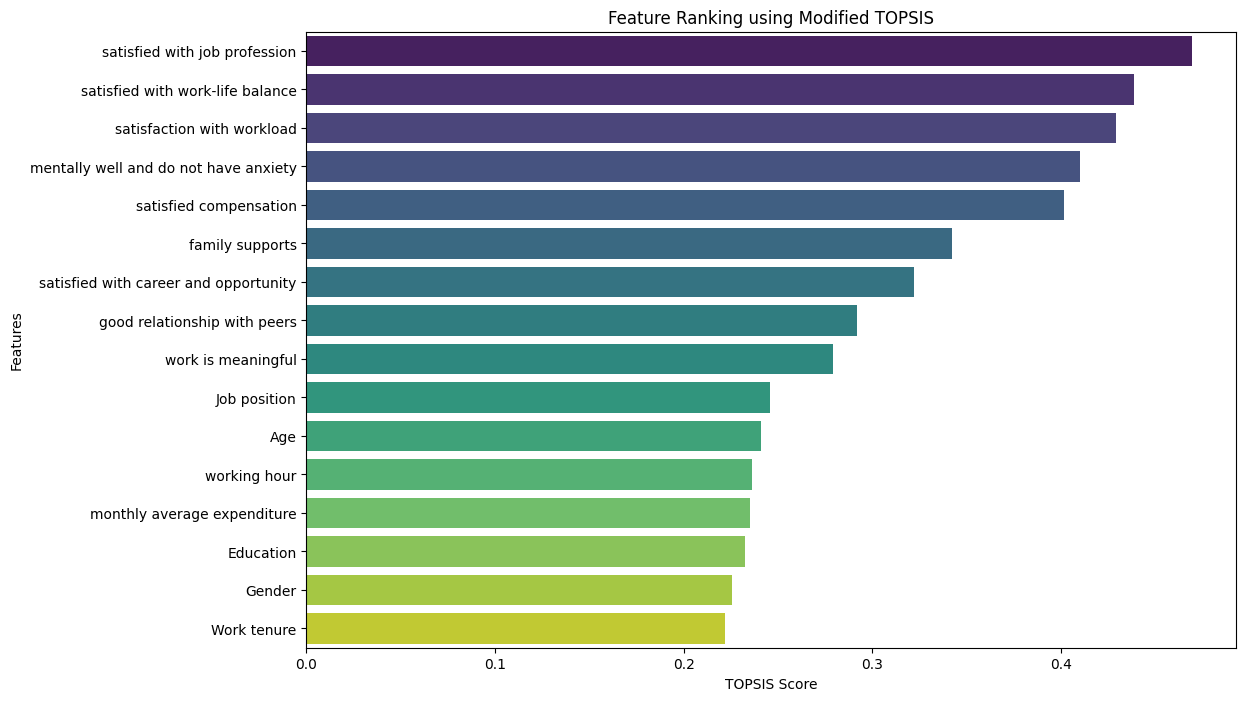

Accuracy: 0.8816
Precision: 0.8400
Recall: 0.8077
F1 Score: 0.8235
MCC: 0.7348
AUC: 0.9367

Confusion Matrix:
 [[92  8]
 [10 42]]


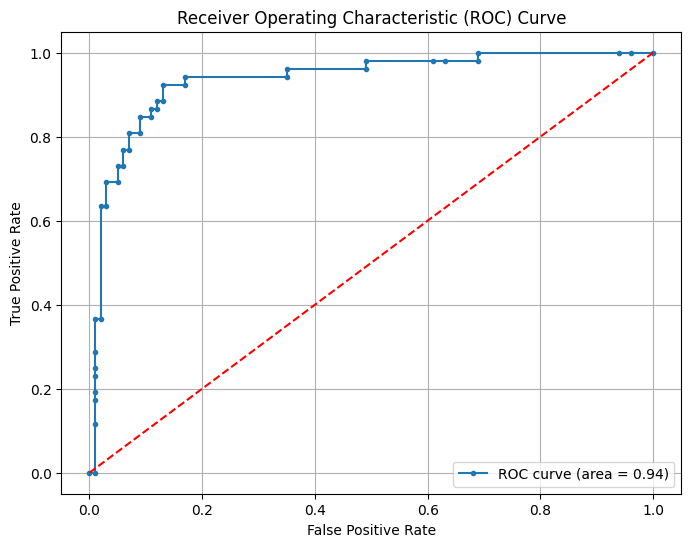

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, roc_auc_score, roc_curve, confusion_matrix
)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = data.drop(columns=['TOI (turnover intention)'])
y = data['TOI (turnover intention)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 1. Compute Information Gain Scores
info_gain_selector = SelectKBest(score_func=mutual_info_classif, k='all')
info_gain_selector.fit(X_train_resampled, y_train_resampled)
info_gain_scores = info_gain_selector.scores_
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Info_Gain': info_gain_scores})

# 2. Compute SelectKBest Scores
select_k_best = SelectKBest(score_func=f_classif, k='all')
select_k_best.fit(X_train_resampled, y_train_resampled)
select_kbest_scores = select_k_best.scores_
select_kbest_df = pd.DataFrame({'Feature': X.columns, 'SelectKBest_Score': select_kbest_scores})

# 3. Compute RFE Scores
rf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=1)
rfe.fit(X_train_resampled, y_train_resampled)
rfe_ranking = rfe.ranking_
rfe_df = pd.DataFrame({'Feature': X.columns, 'RFE_Ranking': rfe_ranking})

# Aggregate Scores
combined_df = info_gain_df.merge(select_kbest_df, on='Feature').merge(rfe_df, on='Feature')
combined_df['RFE_Importance'] = combined_df['RFE_Ranking'].max() - combined_df['RFE_Ranking']  # Invert ranking for consistency (higher is better)

# Normalize scores for TOPSIS
scaler = StandardScaler()
scores = scaler.fit_transform(combined_df[['Info_Gain', 'SelectKBest_Score', 'RFE_Importance']])

# Add normalized scores back to DataFrame
combined_df[['Norm_Info_Gain', 'Norm_SelectKBest_Score', 'Norm_RFE_Importance']] = scores

# Prepare for TOPSIS
topsis_matrix = combined_df[['Norm_Info_Gain', 'Norm_SelectKBest_Score', 'Norm_RFE_Importance']].values

# Define weights for TOPSIS (customized)
weights = np.array([1.5, 1, 1.5])  # Adjust weights as per your preference

# Ideal (best) and anti-ideal (worst) solutions
ideal_best = np.max(topsis_matrix, axis=0)
ideal_worst = np.min(topsis_matrix, axis=0)

# Weighted normalized decision matrix
weighted_data = topsis_matrix * weights

# Calculate Manhattan, Euclidean, and Chebyshev distances
manhattan_to_best = np.sum(np.abs(weighted_data - ideal_best), axis=1)
manhattan_to_worst = np.sum(np.abs(weighted_data - ideal_worst), axis=1)

euclidean_to_best = np.sqrt(np.sum((weighted_data - ideal_best)**2, axis=1))
euclidean_to_worst = np.sqrt(np.sum((weighted_data - ideal_worst)**2, axis=1))

chebyshev_to_best = np.max(np.abs(weighted_data - ideal_best), axis=1)
chebyshev_to_worst = np.max(np.abs(weighted_data - ideal_worst), axis=1)

# Combine distances using robust distance calculation
dist_to_best = np.sqrt((np.log(1 + manhattan_to_best))**2 +
                       (np.log(1 + euclidean_to_best))**2 +
                       (np.log(1 + chebyshev_to_best))**2)

dist_to_worst = np.sqrt((np.log(1 + manhattan_to_worst))**2 +
                        (np.log(1 + euclidean_to_worst))**2 +
                        (np.log(1 + chebyshev_to_worst))**2)

# Modified similarity formula
topsis_scores = 1 / (1 + dist_to_best)

# Add TOPSIS scores to DataFrame
combined_df['TOPSIS_Score'] = topsis_scores

# Rank features based on TOPSIS score
combined_df = combined_df.sort_values(by='TOPSIS_Score', ascending=False)

# Display final ranking
print(combined_df[['Feature', 'TOPSIS_Score', 'Info_Gain', 'SelectKBest_Score', 'RFE_Importance']])

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='TOPSIS_Score', y='Feature', data=combined_df, palette='viridis')
plt.title('Feature Ranking using Modified TOPSIS')
plt.xlabel('TOPSIS Score')
plt.ylabel('Features')
plt.show()

# Select top k features
k = 15
selected_features = combined_df['Feature'].head(k).values

# Transform the data using selected features
X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

# Grid Search for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train_resampled)

# Select the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_selected)
y_prob = best_model.predict_proba(X_test_selected)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"AUC: {auc:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


                                  Feature  SelectKBest_Score
6              satisfaction with workload         613.847322
10          satisfied with job profession         471.553455
7                  satisfied compensation         417.127252
12       satisfied with work-life balance         411.138744
15  mentally well and do not have anxiety         364.942572
14                        family supports         338.326726
9   satisfied with career and opportunity         322.475929
13                     work is meaningful         302.967663
8            good relationship with peers         283.510830
0                                     Age          25.355219
11            monthly average expenditure          14.601259
2                             Work tenure          10.985586
1                                  Gender           8.855874
5                            working hour           6.611628
3                               Education           0.431122
4                       

<ipython-input-6-30d23aed19d8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SelectKBest_Score', y='Feature', data=select_kbest_df, palette='viridis')


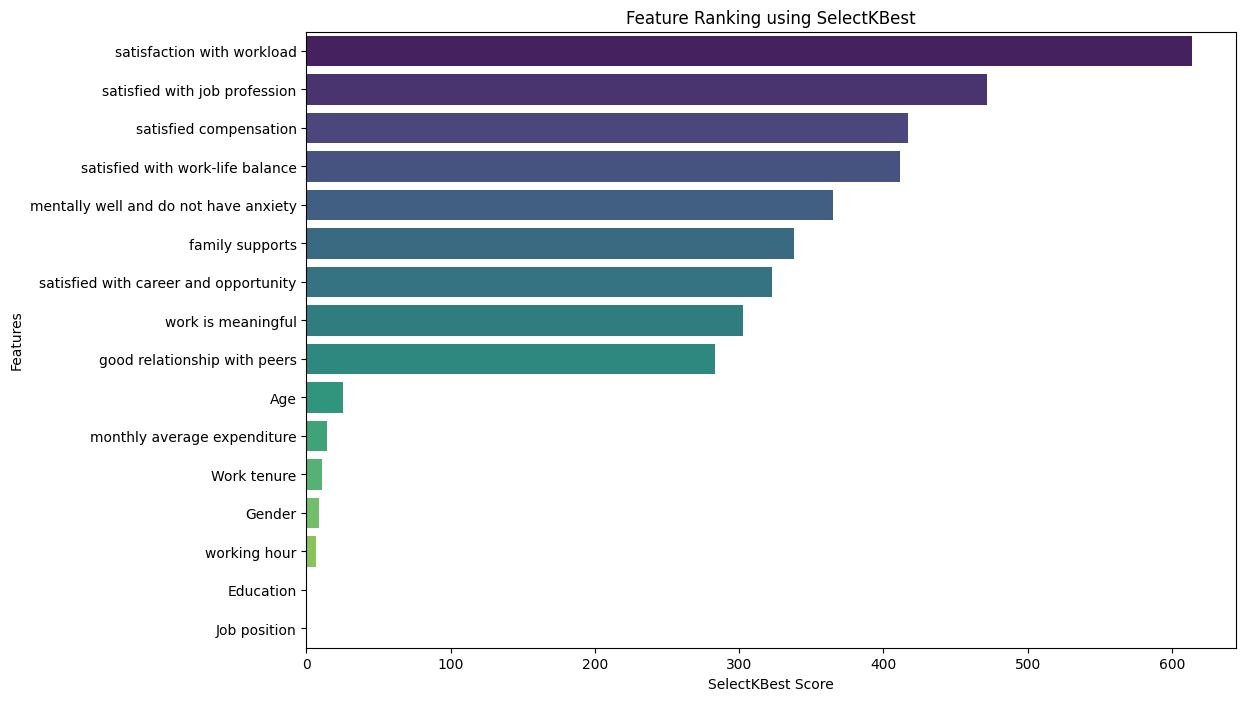

NameError: name 'rf' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, roc_auc_score, roc_curve, confusion_matrix
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = data.drop(columns=['TOI (turnover intention)'])
y = data['TOI (turnover intention)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Compute SelectKBest Scores
select_k_best = SelectKBest(score_func=f_classif, k='all')
select_k_best.fit(X_train_resampled, y_train_resampled)
select_kbest_scores = select_k_best.scores_
select_kbest_df = pd.DataFrame({'Feature': X.columns, 'SelectKBest_Score': select_kbest_scores})

# Rank features based on SelectKBest scores
select_kbest_df = select_kbest_df.sort_values(by='SelectKBest_Score', ascending=False)

# Display final ranking
print(select_kbest_df[['Feature', 'SelectKBest_Score']])

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='SelectKBest_Score', y='Feature', data=select_kbest_df, palette='viridis')
plt.title('Feature Ranking using SelectKBest')
plt.xlabel('SelectKBest Score')
plt.ylabel('Features')
plt.show()

# Function to train and evaluate model for different k values
def evaluate_model(k, X_train_resampled, y_train_resampled, X_test, y_test, select_kbest_df):
    selected_features = select_kbest_df['Feature'].head(k).values
    X_train_selected = X_train_resampled[selected_features]
    X_test_selected = X_test[selected_features]

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['auto', 'sqrt']
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train_resampled)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_selected)
    y_prob = best_model.predict_proba(X_test_selected)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Results for k={k}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"AUC: {auc:.4f}")
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\n")

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label=f'ROC curve for k={k} (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', color='r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for k={k}')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Evaluate model for k=15, k=10, k=5
evaluate_model(15, X_train_resampled, y_train_resampled, X_test, y_test, select_kbest_df)
evaluate_model(10, X_train_resampled, y_train_resampled, X_test, y_test, select_kbest_df)
evaluate_model(5, X_train_resampled, y_train_resampled, X_test, y_test, select_kbest_df)
